# Explore Exercises

#### Imports:

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats #pearsonr spearmanr
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from math import sqrt
# to turn off pink warning boxes basically for display purposes in class
# import warnings
# warnings.filterwarnings('ignore')

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import tools for scaling
import sklearn.preprocessing

# classification algorithms
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# linear regression algorithms
from sklearn.linear_model import LinearRegression

# classification analysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to see local file system
import os

# import our own modules
import env
import acquire

np.random.seed = 9751

# jupyter settings
%matplotlib inline

Goal: Using the Zillow Dataset, find the key drivers of property value for single family properties. 

Parameters: MVP features are square feet of the home, number of bedrooms, and number of bathrooms

Target: estimate the property's assessed value using taxvaluedollarcnt.

Take-aways from preparatory phase univariate analysis:

Number of bedrooms: Distribution of number of bedrooms looks roughly normal but right skewed, centered on 3.

Number of bathrooms: Distribution of number of bathrooms is roughly normal but right skewed, centered on 2.

Finished Square Feet: Distribution of finished square ft approx normal but right skewed, centered around 1500 square ft.

Tax Value: Distribution of tax value of homes is roughly normal but right skewed, centered around $250k.

Build Year: year built is approx normal, with a slight left skew, centered around 1960.

Tax Amount: Distribution of tax amount is relatively normal with a right skew, centered at about $4000

FIPS: FIPS codes represent the county that the property is in. There are three represented in this dataset: 6037=Los Angeles County 66.6%, 6059=Orange County 25.8%, # 6111=Ventura County 7.6%


Preliminary Questions for Exploration:

1. Why do some properties have a much higher value than others when they are located so close to each other? 
     
    a. Using the data we can explore this by using the fips code as a proxy for location and examine properties within the same county. 
        i. Get descriptive stats on the whole train dataset 
        ii. Get descriptive stats by county(fips code). 
    b. Is each county above or below mean in any given category?
        i. What is the mode number of bedrooms by county? Above or below total?
        ii. What is the mode number of bathrooms by county? Above or below total?
        iii. What is the mean square footage by county? Above or below total?
        iv. What is the mean tax value by county? Above or below average?
    
2. Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? 
    a. Compare cost for 0 to 5 bedroom houses across counties
        i. use statistical tests to determine if those differences in means are significant.
    b. Compare cost for 0 to 5 bathroom houses across counties
        i. use statistical tests to determine if those differences in means are significant.
    
3. Is having 1 bathroom worse than having 2 bedrooms? This is just a question of the trade-offs. 
    a. Plot what an extra bedroom gets you in a given county.
    b. Plot what an extra bathroom gets you in a given county.
    c. Plot square footage v. value by county

In [2]:
# let's get our wrangled data imported to train, val, test:
from wrangle import wrangle_zillow
train, val, test = wrangle_zillow()

In [3]:
# now take a look at the columns
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built',
       'tax_amount', 'fips'],
      dtype='object')

In [4]:
# what are the feature types?
# bed and bath could be categorical, 
# but I have them as numbers so I will go ahead and plot them that way.
# area is continuous
# year_built is continuous
# tax_amount is continuous (careful of data leakage with this field) I think
# it would be most useful here to derive a tax rate(or rates? if tiered)
# for each county and then use that as a feature instead of tax_value
# I converted fips to an object as it just represents county so categorical there



In [5]:
# I need to split the features from the target for each of the datasets:
X_train = train.drop(columns='tax_value')
y_train = train.tax_value
X_val = val.drop(columns='tax_value')
y_val = val.tax_value
X_test = test.drop(columns='tax_value')
y_test = test.tax_value

##### 3.syl) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [6]:
# if we're looking for a regression line, then we're looking for
# correlation and that means we are doing pairwise only on continuous
# features only. We'll treat bedrooms and bathrooms as continuous for
# this as well as area and year_built
# Make a list of columns to explore pairwise

# def separate_cols(df):
#     cont_cols = []
#     cat_cols = []
#     for col in df.columns:
#         if df[col].dtype.str.startswith(
#         'int') | df[col].dtype.str.startswith('float'):
#             cont_cols.append(col)
#         else:
#             cat_cols.append(col)
#     return cont_cols, cat_cols

# cont_cols, cat_cols = separate_cols(train)



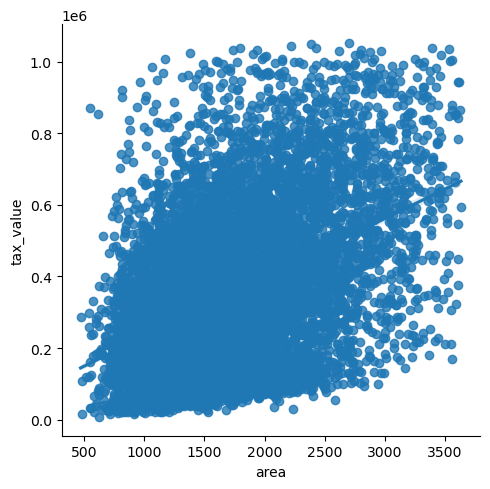

In [7]:
# need to get smaller samples of train to plot so doesn't melt computer:
train_sample = train.sample(n=10_000)
sns.lmplot(x='area', y='tax_value', data=train_sample)
plt.show()


         i. What is the mode number of bedrooms by county? Above or below total?
        
        

In [8]:
print(f'The mode number of bedrooms for all fips is {train.bedrooms.mode()}')
print(f'The mode number of bedrooms for for fip 6037, L.A. County is \
{train[train.fips == 6037].bedrooms.mode()}')
print(f'The mode number of bedrooms for for fip 6059, Orange County is \
{train[(train.fips == 6059)].bedrooms.mode()}')
print(f'The mode number of bedrooms for for fip 6111, Ventura County is \
{train[(train.fips == 6111)].bedrooms.mode()}')

The mode number of bedrooms for all fips is 0    3
Name: bedrooms, dtype: int64
The mode number of bedrooms for for fip 6037, L.A. County is 0    3
Name: bedrooms, dtype: int64
The mode number of bedrooms for for fip 6059, Orange County is 0    3
Name: bedrooms, dtype: int64
The mode number of bedrooms for for fip 6111, Ventura County is 0    3
Name: bedrooms, dtype: int64


ii. What is the mode number of bathrooms by county? Above or below total?

In [9]:
print(f'The mode number of bathrooms for all fips is {train.bathrooms.mode()}')
print(f'The mode number of bathrooms for for fip 6037, L.A. County is \
{train[train.fips == 6037].bathrooms.mode()}')
print(f'The mode number of bathrooms for for fip 6059, Orange County is \
{train[(train.fips == 6059)].bathrooms.mode()}')
print(f'The mode number of bedrooms for for fip 6111, Ventura County is \
{train[(train.fips == 6111)].bathrooms.mode()}')

The mode number of bathrooms for all fips is 0    2.0
Name: bathrooms, dtype: float64
The mode number of bathrooms for for fip 6037, L.A. County is 0    2.0
Name: bathrooms, dtype: float64
The mode number of bathrooms for for fip 6059, Orange County is 0    2.0
Name: bathrooms, dtype: float64
The mode number of bedrooms for for fip 6111, Ventura County is 0    2.0
Name: bathrooms, dtype: float64


        
        iii. What is the mean square footage by county? Above or below total?
        
        iv. What is the mean tax value by county? Above or below average?

In [13]:
# correlation heatmap

train_corrs = train.corr(method='spearman')

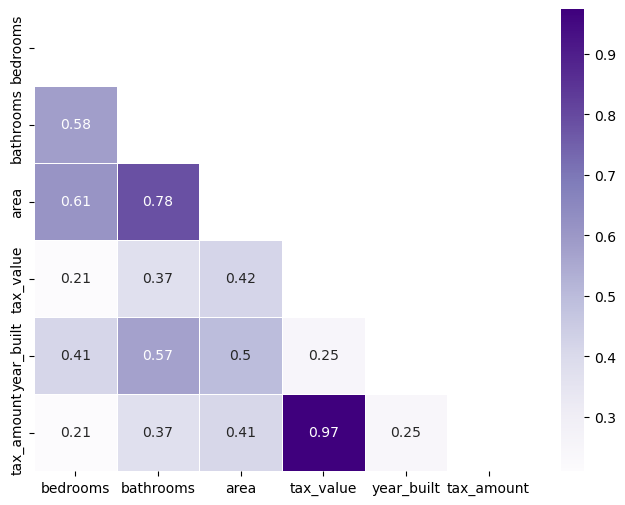

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_corrs, cmap='Purples', annot=True, linewidth=0.5, mask=np.triu(train_corrs))
# plt.ylim(0, 4)
plt.show()

In [ ]:
# I can really pop that line color if I want.

sns.lmplot(x="exam1", y="final_grade", data=train, line_kws={'color': 'red'})
plt.show()
